In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import joblib

In [2]:
df = pd.read_csv("temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41
...,...,...,...,...,...,...,...,...,...
343,2019,12,27,Tues,42,42,45.2,47,47
344,2019,12,28,Wed,42,47,45.3,48,58
345,2019,12,29,Thurs,47,48,45.3,48,65
346,2019,12,30,Fri,48,48,45.4,57,42


In [3]:
# checking null values
df.isnull().sum()

year       0
month      0
day        0
week       0
temp_2     0
temp_1     0
average    0
actual     0
friend     0
dtype: int64

In [4]:
get_x = df.drop('actual',axis="columns")
get_x

,year,month,day,week,temp_2,temp_1,average,friend
0,2019,1,1,Fri,45,45,45.6,29
1,2019,1,2,Sat,44,45,45.7,61
2,2019,1,3,Sun,45,44,45.8,56
3,2019,1,4,Mon,44,41,45.9,53
4,2019,1,5,Tues,41,40,46.0,41
...,...,...,...,...,...,...,...,...
343,2019,12,27,Tues,42,42,45.2,47
344,2019,12,28,Wed,42,47,45.3,58
345,2019,12,29,Thurs,47,48,45.3,65
346,2019,12,30,Fri,48,48,45.4,42


## Check this part of the code if the accuracy isn't good

In [37]:
dummy = pd.get_dummies(df['week'],drop_first=True)
dummy

,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
343,0,0,0,0,1,0
344,0,0,0,0,0,1
345,0,0,0,1,0,0
346,0,0,0,0,0,0


In [38]:
merged = pd.concat([get_x,dummy],axis="columns")
merged

,year,month,day,week,temp_2,temp_1,average,friend,Mon,Sat,Sun,Thurs,Tues,Wed
0,2019,1,1,Fri,45,45,45.6,29,0,0,0,0,0,0
1,2019,1,2,Sat,44,45,45.7,61,0,1,0,0,0,0
2,2019,1,3,Sun,45,44,45.8,56,0,0,1,0,0,0
3,2019,1,4,Mon,44,41,45.9,53,1,0,0,0,0,0
4,2019,1,5,Tues,41,40,46.0,41,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2019,12,27,Tues,42,42,45.2,47,0,0,0,0,1,0
344,2019,12,28,Wed,42,47,45.3,58,0,0,0,0,0,1
345,2019,12,29,Thurs,47,48,45.3,65,0,0,0,1,0,0
346,2019,12,30,Fri,48,48,45.4,42,0,0,0,0,0,0


In [39]:
final  = merged.drop('week',axis ="columns")
final

,year,month,day,temp_2,temp_1,average,friend,Mon,Sat,Sun,Thurs,Tues,Wed
0,2019,1,1,45,45,45.6,29,0,0,0,0,0,0
1,2019,1,2,44,45,45.7,61,0,1,0,0,0,0
2,2019,1,3,45,44,45.8,56,0,0,1,0,0,0
3,2019,1,4,44,41,45.9,53,1,0,0,0,0,0
4,2019,1,5,41,40,46.0,41,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2019,12,27,42,42,45.2,47,0,0,0,0,1,0
344,2019,12,28,42,47,45.3,58,0,0,0,0,0,1
345,2019,12,29,47,48,45.3,65,0,0,0,1,0,0
346,2019,12,30,48,48,45.4,42,0,0,0,0,0,0


## Spliting the dataset

In [40]:
y= df['actual']
y

0      45
1      44
2      41
3      40
4      44
       ..
343    47
344    48
345    48
346    57
347    40
Name: actual, Length: 348, dtype: int64

In [46]:
x_train,x_test,y_train,y_test=  train_test_split(final,y,test_size=0.2,random_state=42)

# Making the Random forest model

In [65]:
climate_model = ensemble.RandomForestRegressor(n_estimators=100,random_state=42)

In [66]:
climate_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [67]:
climate_model.score(x_test,y_test)

0.8303179214880375

In [68]:
joblib.dump(climate_model,"climate_model")

['climate_model']

## Plotting 

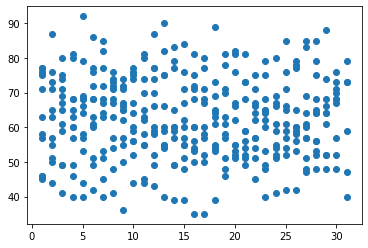